In [1]:
#ライブラリのインポート
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 生成に使う画像の準備

In [3]:
#サンプル画像を読み込んで生成
img_1 = Image.open('/content/drive/MyDrive/deepdream Image/image1.jpg')
img_2 = Image.open('/content/drive/MyDrive/deepdream Image/image2.jpg')

#画像をブレンド
image = Image.blend(img_1,img_2,0.5)
image.save('img_0.jpg')

In [4]:
#画像を処理して読み込み
sample_image = tf.keras.preprocessing.image.load_img('img_0.jpg')

In [5]:
#画像の情報と前処理
print(np.shape(sample_image))
print(type(sample_image))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

(420, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [6]:
#画像の標準化
sample_image = np.array(sample_image)/255.0
sample_image.shape

(420, 640, 3)

In [7]:
#画像の次元を変更
sample_image = tf.expand_dims(sample_image,axis=0)
print(np.shape(sample_image))

(1, 420, 640, 3)


In [8]:
#他の画像も準備
img_3 = Image.open('/content/drive/MyDrive/deepdream Image/image3.jpg')
img_4 = Image.open('/content/drive/MyDrive/deepdream Image/image4.jpg')
img_5 = Image.open('/content/drive/MyDrive/deepdream Image/image5.jpg')
img_6 = Image.open('/content/drive/MyDrive/deepdream Image/image6.jpg')
#画像をブレンド
image1 = Image.blend(img_3,img_4,0.5)
image2 = Image.blend(img_5,img_6,0.5)
image1.save('img_1.jpg')
image2.save('img_2.jpg')

In [9]:
sample_image1 = tf.keras.preprocessing.image.load_img('img_1.jpg')
sample_image2 = tf.keras.preprocessing.image.load_img('img_2.jpg')

In [10]:
sample_image1 = tf.keras.preprocessing.image.img_to_array(sample_image1)
sample_image2 = tf.keras.preprocessing.image.img_to_array(sample_image2)

sample_image1 = np.array(sample_image1)/255.0
sample_image2 = np.array(sample_image2)/255.0

sample_image1 = tf.expand_dims(sample_image1,axis=0)
sample_image2 = tf.expand_dims(sample_image2,axis=0)

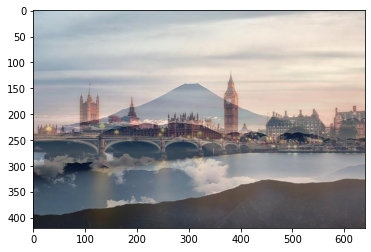

In [11]:
plt.imshow(np.squeeze(sample_image))

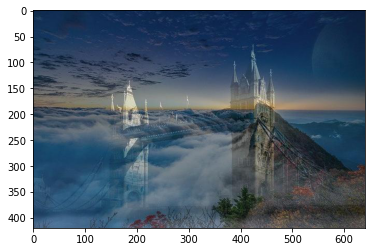

In [12]:
plt.imshow(np.squeeze(sample_image1))

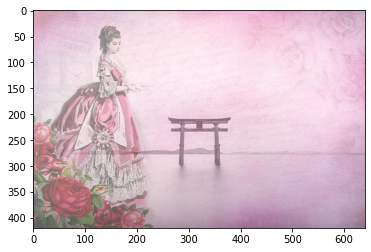

In [13]:
plt.imshow(np.squeeze(sample_image2))

## 学習済みモデルの読み込みとDeepDreamの構築

In [14]:
# 学習済みモデルのロード
base_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [15]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
#DeepDreamの構築
#使う層をピックアップしてモデルに組み込む
names = ['mixed3','mixed5','mixed7']
layers = [base_model.get_layer(name).output for name in names]
deepdream_model = tf.keras.Model(inputs = base_model.input,outputs = layers)

In [17]:
deepdream_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## DeepDreamの実装

In [18]:
sample_image.shape

TensorShape([1, 420, 640, 3])

In [21]:
sample_image = np.squeeze(sample_image)

In [22]:
# ロスを計算する関数の定義
def calc_loss(image,model):
  img_batch = tf.expand_dims(image,axis=0)
  layer_activations = model(img_batch)
  print('Activation Values:',layer_activations)

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)
  print('Loss:',losses)
  print('Loss Shape:',np.shape(losses))
  print('Loss Sum:',tf.reduce_sum(losses))
  return tf.reduce_sum(losses)

In [23]:
loss = calc_loss(tf.Variable(sample_image),deepdream_model)

Activation Values: [<tf.Tensor: shape=(1, 24, 38, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.03454699,
          0.6175713 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.8102781 ,
          0.17558236, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.9600827 ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 1.1469018 ,
          0.57452184, 0.0632965 ]],

        [[0.        , 0.        , 0.        , ..., 0.15296909,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.1660558 ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.58203906,
          0.        , 0.        ],
         ...,
         [

In [24]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.5688862>

In [25]:
# DeepDreamの勾配を辿る関数
@tf.function
def deepdream(model,image,step_size):
  with tf.GradientTape() as tape:
    tape.watch(image)
    loss = calc_loss(image,model)

  gradients = tape.gradient(loss,image)
  print('Gradients:',gradients)
  print('Gradients Shape:',np.shape(gradients))
  gradients /= tf.math.reduce_std(gradients)

  image = image + gradients + step_size
  image = tf.clip_by_value(image,-1,1)

  return loss,image

In [26]:
# DeepDreamを実行するための関数
def run_deep_dream_simple(model,image,steps=100,step_size=0.01):
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss,image = deepdream(model,image,step_size)

    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print('Step {},loss{}'.format(step,loss))

    plt.figure(figsize=(12,12))
    plt.imshow(deprocess(image))
    plt.show()

    return deprocess(image)

In [27]:
def deprocess(image):
  image = 255*(image + 1.0) /2.0
  return tf.cast(image,tf.uint8)

In [28]:
sample_image.shape

(420, 640, 3)

In [29]:
sample_image = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))
dream_img = run_deep_dream_simple(model=deepdream_model,image=sample_image,steps=4000,step_size=0.001)

Output hidden; open in https://colab.research.google.com to view.

In [56]:
sample_image1 = np.array(tf.keras.preprocessing.image.load_img('img_1.jpg'))
dream_img = run_deep_dream_simple(model=deepdream_model,image=sample_image1,steps=500,step_size=0.001)

Output hidden; open in https://colab.research.google.com to view.

In [57]:
sample_image2 = np.array(tf.keras.preprocessing.image.load_img('img_2.jpg'))
dream_img = run_deep_dream_simple(model=deepdream_model,image=sample_image2,steps=2000,step_size=0.002)

Output hidden; open in https://colab.research.google.com to view.